In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

In [4]:
# Location of your midi filesfiles
midi_path = Path('data/midi/examples')
data_path = Path('data/numpy')
data_save_name = 'musicitem_data_save.pkl'

In [5]:
midi_files = get_files(midi_path, '.mid', recurse=True)
data = MusicDataBunch.from_files(midi_files, data_path, processors=[Midi2ItemProcessor()], bs=4, bptt=128,
                                 encode_position=True, dl_tfms=[batch_position_tfm])

In [6]:
config = default_config()
config['encode_position'] = True
config['transpose_range'] = (0, 12)
config['mask_steps'] = 4

model = get_language_model(arch=MusicTransformerXL, vocab_sz=len(data.vocab), config=config.copy())
learn = MusicLearner(data, model)

learn.to_fp16(dynamic=True, clip=0.5);
learn.fit_one_cycle(4)

### Random window mask

In [10]:
from musicautobot.utils.attention_mask import *

In [12]:
lm_mask(x_len=10, device=None)

tensor([[[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]], dtype=torch.uint8)

In [15]:
window_mask(10, None, size=(2,0))

tensor([[[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
          [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]]], dtype=torch.uint8)

### Positional Encoding

In [17]:
midi_file = Path('data/midi/notebook_examples/single_bar_example.mid')
item = MusicItem.from_file(midi_file, data.vocab);

In [19]:
item.data

array([  0,   1,  81, 139,  61, 153,  57, 153,  54, 153,   8, 139,  80, 139,   8, 139,  80, 139,   8, 139,  78, 139,
         8, 139,  78, 139,   8, 139,  76, 141,   8, 141,  73, 138,   8, 138,  71, 138])

In [21]:
item.to_text()

'xxbos xxpad n72 d2 n52 d16 n48 d16 n45 d16 xxsep d2 n71 d2 xxsep d2 n71 d2 xxsep d2 n69 d2 xxsep d2 n69 d2 xxsep d2 n67 d4 xxsep d4 n64 d1 xxsep d1 n62 d1'

In [18]:
item.position

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  4,  4,  4,  4,  6,  6,  6,  6,  8,  8,  8,  8,
       10, 10, 10, 10, 14, 14, 14, 14, 15, 15])

In [20]:
# beat
item.position // 4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3])

### Transpose

## 5. Predict

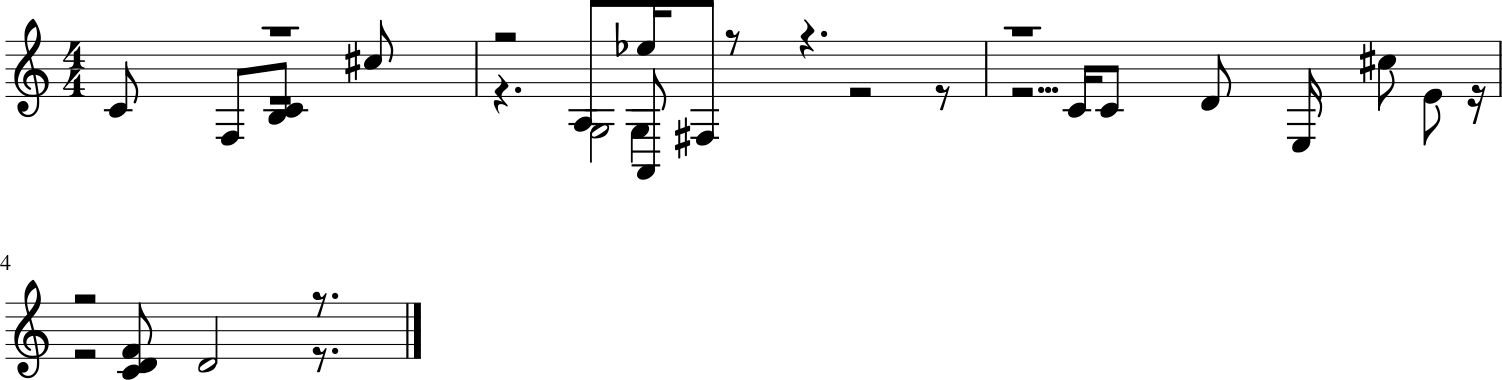

In [7]:
midi_file = Path('data/midi/notebook_examples/single_bar_example.mid')
item = MusicItem.from_file(midi_file, data.vocab);
pred = learn.predict(item, n_words=100)
pred.show()

In [ ]:
pred.play()